# Processed data

In [1]:
%reload_ext autoreload

%autoreload 2

import os

import iris
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray as xr

from ml_downscaling_emulator import UKCPDatasetMetadata
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree

## Vorticity

In [2]:
moose_dir = os.path.join(os.getenv("DERIVED_DATA"), "moose")
vort_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-4x", variable="vorticity850")

vort_ds = xr.open_mfdataset(vort_meta.existing_filepaths())
vort_ds

<xarray.Dataset>
Dimensions:                  (time: 1080, grid_latitude: 64,
                              grid_longitude: 64, bnds: 2)
Coordinates:
    pressure                 float32 850.0
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  (time) object 1979-09-01 00:00:00 ... 2059-09-01...
    realization              int32 1100000
  * time                     (time) object 1980-12-01 12:00:00 ... 2061-11-30...
  * grid_latitude            (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    grid_latitude_bnds       (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds      (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

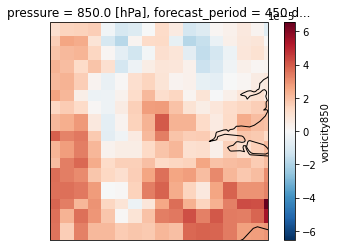

In [3]:
ax = plt.axes(projection=cp_model_rotated_pole)
vort_ds.isel(time=0)['vorticity850'].plot(ax=ax)
ax.coastlines()

(array([2.80000e+01, 2.40000e+01, 4.50000e+01, 3.05000e+02, 5.91000e+02,
        1.77400e+03, 4.38300e+03, 1.31580e+04, 3.28620e+04, 7.56950e+04,
        1.49258e+05, 2.52078e+05, 3.83165e+05, 5.14366e+05, 5.92893e+05,
        5.82553e+05, 5.22140e+05, 4.05765e+05, 2.87245e+05, 1.95150e+05,
        1.31809e+05, 8.93170e+04, 5.92870e+04, 4.19260e+04, 2.77050e+04,
        1.87740e+04, 1.22890e+04, 8.55500e+03, 4.42700e+03, 3.84100e+03,
        2.16000e+03, 2.20500e+03, 1.79400e+03, 1.03600e+03, 9.47000e+02,
        9.92000e+02, 9.35000e+02, 7.12000e+02, 5.36000e+02, 3.70000e+02,
        2.61000e+02, 1.20000e+02, 8.00000e+01, 4.80000e+01, 1.20000e+01,
        3.20000e+01, 2.00000e+01, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([-1.53877034e-04, -1.44177483e-04, -1.34477931e-04, -1.24778379e-04,
        -1.15078827e-04, -1.05379276e-04, -9.56797240e-05, -8.59801723e-05,
        -7.62806206e-05, -6.65810689e-05, -5.68815172e-05, -4.71819654e-05,
        -3.74824137e-05, -2.77828620e-05

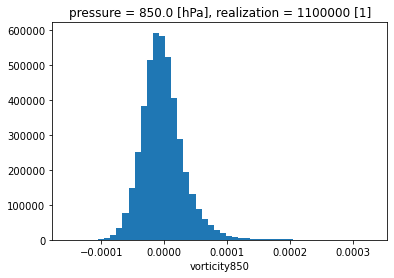

In [4]:
vort_ds['vorticity850'].plot(bins=50)

## Target Pr

In [5]:
pr_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km", variable="pr")

pr_ds = xr.open_mfdataset(pr_meta.existing_filepaths()).rename({pr_meta.variable: f'target_{pr_meta.variable}'})
pr_ds

<xarray.Dataset>
Dimensions:                     (time: 360, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (grid_latitude, bnds) float32 dask.array<chunksize=(64, 2), meta=np.ndarray>
    grid_longitude_bnds         (grid_longitude, bnds) float32 dask.array<chunksize=(64, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    target_pr                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

(array([1.117119e+06, 1.188210e+05, 7.669800e+04, 4.541500e+04,
        3.128200e+04, 2.358900e+04, 1.683000e+04, 1.279800e+04,
        9.859000e+03, 7.382000e+03, 4.922000e+03, 3.143000e+03,
        1.901000e+03, 1.443000e+03, 1.005000e+03, 6.000000e+02,
        4.130000e+02, 3.190000e+02, 1.870000e+02, 1.700000e+02,
        1.470000e+02, 1.190000e+02, 1.070000e+02, 7.700000e+01,
        6.700000e+01, 3.600000e+01, 3.900000e+01, 2.400000e+01,
        5.000000e+00, 8.000000e+00, 4.000000e+00, 3.000000e+00,
        4.000000e+00, 2.000000e+00, 0.000000e+00, 5.000000e+00,
        1.000000e+00, 1.000000e+00, 3.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 4.000000e+00, 0.000000e+00,
        2.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([0.00000000e+00, 2.64585888e-05, 5.29171775e-05, 7.93757645e-05,
        1.05834355e-04, 1.32292946e-04, 1.58751529e-04, 1.85210112e-04,
        2.11668710e-04, 2.38127293e-04, 2.64585891

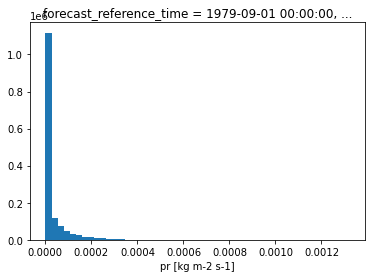

In [6]:
pr_ds['target_pr'].plot(bins=50)

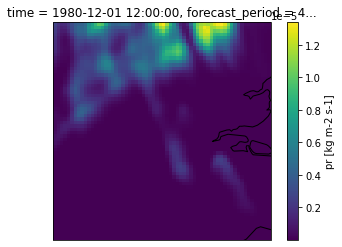

In [7]:
ax = plt.axes(projection=cp_model_rotated_pole)
pr_ds.isel(time=0)['target_pr'].plot(ax=ax)
ax.coastlines()

In [8]:
combined_ds = xr.combine_by_coords([vort_ds, pr_ds], compat='no_conflicts', combine_attrs="drop_conflicts", coords="all", join="inner", data_vars="all")
combined_ds = combined_ds.assign_coords(season=(('time'), (combined_ds['time.month'].data % 12 // 3)))
combined_ds

<xarray.Dataset>
Dimensions:                     (time: 360, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 1979-09...
    realization                 int32 1100000
    pressure                    float32 850.0
    season                      (time) int64 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (grid_latitude, bnds, time) float32 dask.array<chunksize=(64, 2, 360), meta=np.ndarray>
    grid_longitude_bnds         (grid_longitude, bnds, time) float32 dask.array<chunksize=(64, 2, 360), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    target_pr                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [9]:
from ml_downscaling_emulator.data.dataset import SeasonStratifiedIntensitySplit

time_encoding = xr.open_dataset(pr_meta.filepath(1981)).time_bnds.encoding

ssi = SeasonStratifiedIntensitySplit(val_prop=0.2, test_prop=0.1, time_encoding=time_encoding)
data_splits = ssi.run(combined_ds)

In [10]:
data_splits["test"]

<xarray.Dataset>
Dimensions:                     (time: 25, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-04 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(25,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 1979-09...
    realization                 int32 1100000
    pressure                    float32 850.0
    season                      (time) int64 0 0 0 0 0 1 1 1 ... 3 3 3 3 3 3 3 3
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) float64 -2.147e+09 ... -2.147e+09
    time_bnds                   (time, bnds) object dask.array<chunksize=(25, 2), meta=np.ndarray>
    grid_latitude_bnds          (grid_latitude, bnds, time) float32 dask.array<chunksize=(64, 2, 25), meta=np.ndarray>
    grid_longitude_bnds         (grid_longitude, bnds, time) float32 dask.array<chunksize=(64, 2, 25), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(25, 2), meta=np.ndarray>
    target_pr                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(25, 64, 64), meta=np.ndarray>
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(25, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

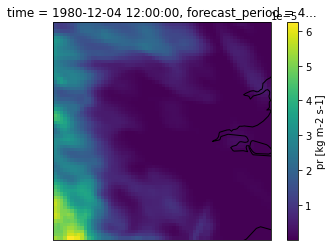

(array([7.9326e+04, 4.7590e+03, 3.5310e+03, 2.4530e+03, 1.8750e+03,
        1.5510e+03, 1.4540e+03, 1.4730e+03, 1.1920e+03, 8.0500e+02,
        6.1700e+02, 5.1300e+02, 4.9000e+02, 4.7600e+02, 3.3000e+02,
        2.6600e+02, 1.9300e+02, 1.7700e+02, 1.7400e+02, 1.3700e+02,
        1.3700e+02, 9.9000e+01, 5.8000e+01, 3.6000e+01, 2.2000e+01,
        2.1000e+01, 2.6000e+01, 2.3000e+01, 1.5000e+01, 1.1000e+01,
        1.5000e+01, 1.3000e+01, 1.0000e+01, 6.0000e+00, 9.0000e+00,
        6.0000e+00, 8.0000e+00, 1.3000e+01, 6.0000e+00, 6.0000e+00,
        6.0000e+00, 9.0000e+00, 7.0000e+00, 7.0000e+00, 1.1000e+01,
        8.0000e+00, 6.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([1.13116287e-11, 8.15797284e-06, 1.63159348e-05, 2.44738967e-05,
        3.26318586e-05, 4.07898187e-05, 4.89477825e-05, 5.71057426e-05,
        6.52637027e-05, 7.34216665e-05, 8.15796302e-05, 8.97375940e-05,
        9.78955504e-05, 1.06053514e-04, 1.14211478e-04, 1.22369442e-04,
        1.30527405e-04, 1.3868

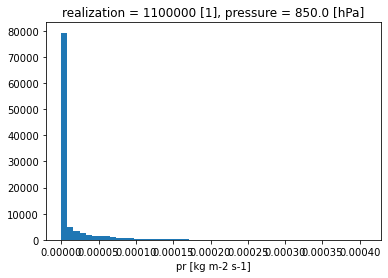

In [11]:
ax = plt.axes(projection=cp_model_rotated_pole)
data_splits["test"].isel(time=0)['target_pr'].plot(ax=ax)
ax.coastlines()

plt.show()

data_splits["test"]['target_pr'].plot(bins=50)

In [12]:
data_splits["extreme_test"]

<xarray.Dataset>
Dimensions:                     (time: 44, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1981-01-21 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(44,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 1979-09...
    realization                 int32 1100000
    pressure                    float32 850.0
    season                      (time) int64 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) float64 -2.147e+09 ... -2.147e+09
    time_bnds                   (time, bnds) object dask.array<chunksize=(44, 2), meta=np.ndarray>
    grid_latitude_bnds          (grid_latitude, bnds, time) float32 dask.array<chunksize=(64, 2, 44), meta=np.ndarray>
    grid_longitude_bnds         (grid_longitude, bnds, time) float32 dask.array<chunksize=(64, 2, 44), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(44, 2), meta=np.ndarray>
    target_pr                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(44, 64, 64), meta=np.ndarray>
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(44, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

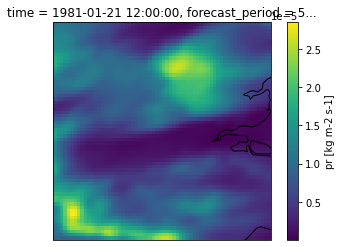

(array([8.0849e+04, 1.8151e+04, 1.4297e+04, 1.2417e+04, 9.6420e+03,
        7.9400e+03, 6.9490e+03, 6.1770e+03, 5.2940e+03, 4.5970e+03,
        4.0120e+03, 3.0330e+03, 2.0490e+03, 1.3310e+03, 8.7300e+02,
        7.0700e+02, 4.4400e+02, 3.6500e+02, 2.3100e+02, 1.9200e+02,
        1.1300e+02, 1.0400e+02, 1.0400e+02, 7.6000e+01, 6.0000e+01,
        4.8000e+01, 5.0000e+01, 3.5000e+01, 2.4000e+01, 2.4000e+01,
        1.8000e+01, 4.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.8435862e-11, 2.3907180e-05, 4.7814341e-05, 7.1721501e-05,
        9.5628668e-05, 1.1953583e-04, 1.4344299e-04, 1.6735015e-04,
        1.9125732e-04, 2.1516447e-04, 2.3907164e-04, 2.6297881e-04,
        2.8688597e-04, 3.1079311e-04, 3.3470028e-04, 3.5860745e-04,
        3.8251461e-04, 4.0642178e-04, 4.303289

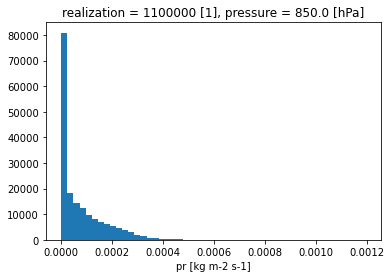

In [13]:
ax = plt.axes(projection=cp_model_rotated_pole)
data_splits["extreme_test"].isel(time=0)['target_pr'].plot(ax=ax)
ax.coastlines()

plt.show()

data_splits["extreme_test"]['target_pr'].plot(bins=50)

(array([7.9326e+04, 4.7590e+03, 3.5310e+03, 2.4530e+03, 1.8750e+03,
        1.5510e+03, 1.4540e+03, 1.4730e+03, 1.1920e+03, 8.0500e+02,
        6.1700e+02, 5.1300e+02, 4.9000e+02, 4.7600e+02, 3.3000e+02,
        2.6600e+02, 1.9300e+02, 1.7700e+02, 1.7400e+02, 1.3700e+02,
        1.3700e+02, 9.9000e+01, 5.8000e+01, 3.6000e+01, 2.2000e+01,
        2.1000e+01, 2.6000e+01, 2.3000e+01, 1.5000e+01, 1.1000e+01,
        1.5000e+01, 1.3000e+01, 1.0000e+01, 6.0000e+00, 9.0000e+00,
        6.0000e+00, 8.0000e+00, 1.3000e+01, 6.0000e+00, 6.0000e+00,
        6.0000e+00, 9.0000e+00, 7.0000e+00, 7.0000e+00, 1.1000e+01,
        8.0000e+00, 6.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00]),
 array([1.13116287e-11, 8.15797284e-06, 1.63159348e-05, 2.44738967e-05,
        3.26318586e-05, 4.07898187e-05, 4.89477825e-05, 5.71057426e-05,
        6.52637027e-05, 7.34216665e-05, 8.15796302e-05, 8.97375940e-05,
        9.78955504e-05, 1.06053514e-04, 1.14211478e-04, 1.22369442e-04,
        1.30527405e-04, 1.3868

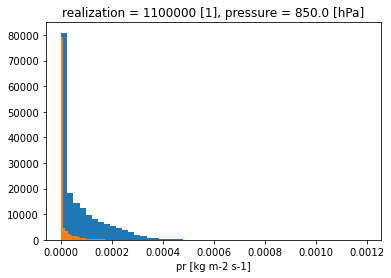

In [14]:
data_splits["extreme_test"]['target_pr'].plot(bins=50)
data_splits["test"]['target_pr'].plot(bins=50)